<a href="https://colab.research.google.com/github/DDiekmann/zonotpy/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture

!wget --no-cache --backups=1 {'https://raw.githubusercontent.com/DDiekmann/zonotpy/main/src/interval_abstraction.py'}

!wget --no-cache --backups=1 {'https://raw.githubusercontent.com/DDiekmann/zonotpy/main/src/nn_functions.py'}

!wget --no-cache --backups=1 {'https://raw.githubusercontent.com/DDiekmann/zonotpy/main/src/zonotope.py'}

In [2]:
import interval_abstraction as interval
import nn_functions as zf
import numpy as np

from zonotope import zono
from matplotlib import pyplot as plt

from IPython import display

network = {'v1': [0.2, 0.7], 'v2': [0.9, 0.45], 'o1': [0.4, 0.1], 'o2': [0.1, 0.2]}

![Google Drive Image](https://drive.google.com/uc?export=view&id=1sJOUvgcPB2hPJ2U5NbwAlgB4gF9WWp2T)

In [3]:
input = zono(values = np.array([[1, 1, 0], [2, 0, 1]]))
i1, i2 = input.split()
print(f"Input I1 : {i1}")
print(f"Input I2 : {i2}")

print(f"Input I1 as Interval : {i1.to_intervals()}")
print(f"Input I2 as Interval : {i2.to_intervals()}")

v1 = zf.affine(network['v2'], i1, i2)

print(f"V1: {v1}")

print(f"V1 as Interval {v1.to_intervals()}")

v1_relu = zf.relu(v1)

Input I1 : [[1 1 0]]
Input I2 : [[2 0 1]]
Input I1 as Interval : [(0, 2)]
Input I2 as Interval : [(1, 3)]
V1: [[1.8  0.9  0.45]]
V1 as Interval [(0.45, 3.1500000000000004)]
ReLU V1: [[1.8  0.9  0.45]]


In [19]:
def create_plot():
  fig, ax = plt.subplots(1, 3)

  fig.set_size_inches(24, 7)

  ax[0].set_title("Input")
  ax[0].set_xlim(-2, 3.5)
  ax[0].set_ylim(-2, 3.1)
  ax[1].set_title("Hidden")
  ax[1].set_xlim(-2, 3.5)
  ax[1].set_ylim(-2, 3.1)
  ax[2].set_title("Output")
  ax[2].set_xlim(-2, 3.5)
  ax[2].set_ylim(-2, 3.1)
  return fig, ax

def relu(x):
  if x > 0: return x
  return 0

def example_points(fig, ax, input : zono, hidden : zono, output : zono, number_of_points = 1):
  for i in range(number_of_points):
    input_point = input.get_random_point()
    ax[0].plot(input_point[0], input_point[1], 'ro', marker="x", markersize=2)
    v1 = relu(network['v1'][0] * input_point[0] + network['v1'][1] * input_point[1])
    v2 = relu(network['v2'][0] * input_point[0] + network['v2'][1] * input_point[1])
    ax[1].plot(v1, v2, 'ro', marker="x", markersize=2)
    o1 = relu(network['o1'][0] * v1 + network['o1'][1] * v2)
    o2 = relu(network['o2'][0] * v1 + network['o2'][1] * v2)
    ax[2].plot(o1, o2, 'ro', marker="x", markersize=2)

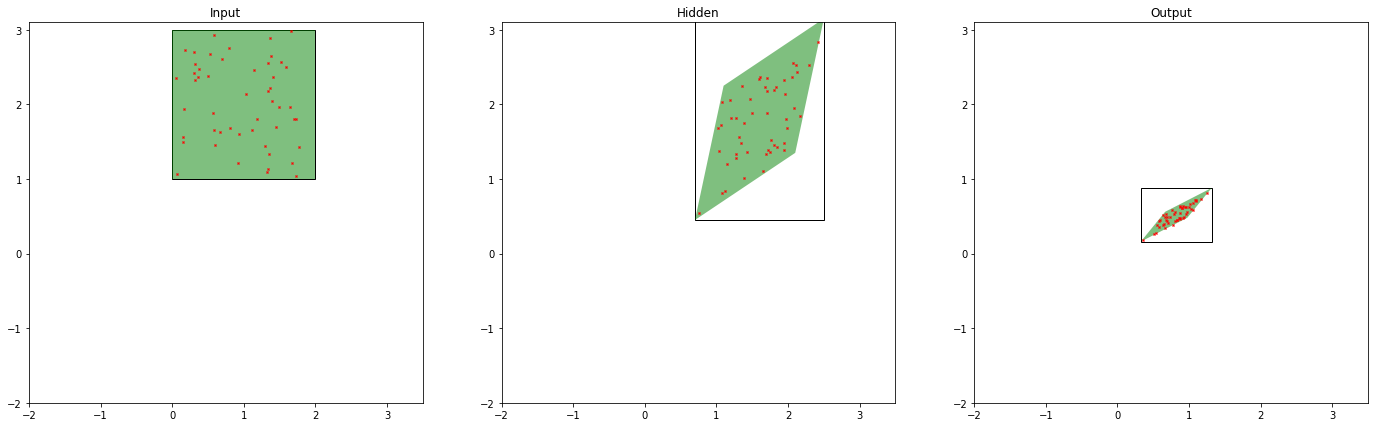

In [21]:
fig, ax = create_plot()

input = zono(values = np.array([[1, 1, 0], [2, 0, 1]]))
i1, i2 = input.split()

i1_i = i1.to_intervals()[0]
i2_i = i2.to_intervals()[0]
interval.visualize(i1_i, i2_i, fig=fig, ax=ax[0])
v1_i = interval.relu(interval.affine(network['v1'], i1_i, i2_i))
v2_i = interval.relu(interval.affine(network['v2'], i1_i, i2_i))
interval.visualize(v1_i, v2_i, fig=fig, ax=ax[1])
o1_i = interval.relu(interval.affine(network['o1'], v1_i, v2_i))
o2_i = interval.relu(interval.affine(network['o2'], v1_i, v2_i))
interval.visualize(o1_i, o2_i, fig=fig, ax=ax[2])

input.visualize(shape=True, fig=fig, ax=ax[0])
v1 = zf.relu(zf.affine(network['v1'], i1, i2))
v2 = zf.relu(zf.affine(network['v2'], i1, i2))
hidden = v1.combine(v2)
hidden.visualize(shape=True, fig=fig, ax=ax[1])
o1 = zf.relu(zf.affine(network['o1'], v1, v2))
o2 = zf.relu(zf.affine(network['o2'], v1, v2))
output = o1.combine(o2)
output.visualize(shape=True, fig=fig, ax=ax[2])

example_points(fig, ax, input=input, hidden=hidden, output=output, number_of_points=50)

plt.show()

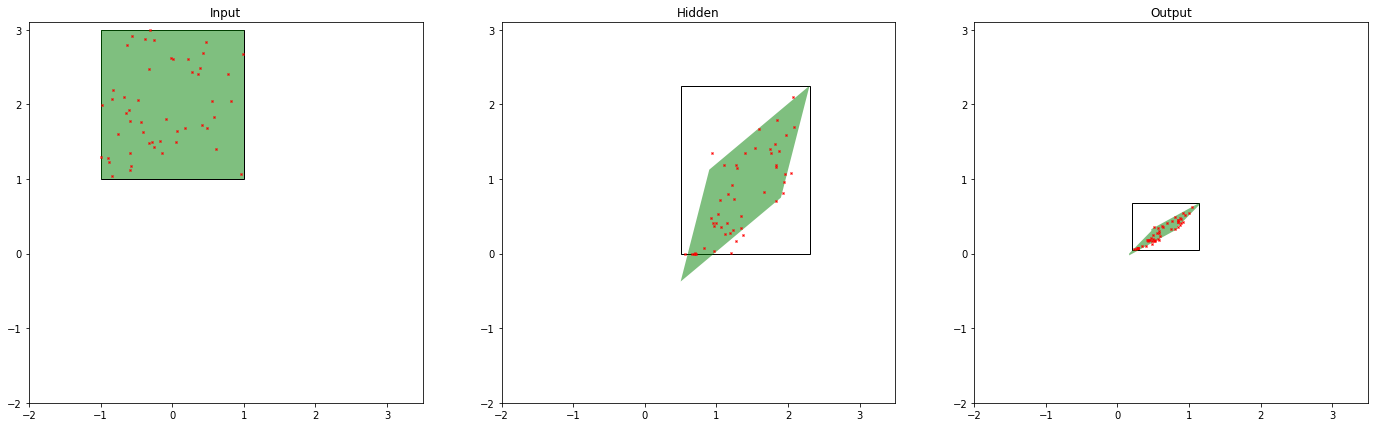

In [20]:
fig, ax = create_plot()

input = zono(values = np.array([[0, 1, 0], [2, 0, 1]]))
i1, i2 = input.split()

i1_i = i1.to_intervals()[0]
i2_i = i2.to_intervals()[0]
interval.visualize(i1_i, i2_i, fig=fig, ax=ax[0])
v1_i = interval.relu(interval.affine(network['v1'], i1_i, i2_i))
v2_i = interval.relu(interval.affine(network['v2'], i1_i, i2_i))
interval.visualize(v1_i, v2_i, fig=fig, ax=ax[1])
o1_i = interval.relu(interval.affine(network['o1'], v1_i, v2_i))
o2_i = interval.relu(interval.affine(network['o2'], v1_i, v2_i))
interval.visualize(o1_i, o2_i, fig=fig, ax=ax[2])

input.visualize(shape=True, fig=fig, ax=ax[0])
v1 = zf.relu(zf.affine(network['v1'], i1, i2))
v2 = zf.relu(zf.affine(network['v2'], i1, i2))
hidden = v1.combine(v2)
hidden.visualize(shape=True, fig=fig, ax=ax[1])
o1 = zf.relu(zf.affine(network['o1'], v1, v2))
o2 = zf.relu(zf.affine(network['o2'], v1, v2))
output = o1.combine(o2)
output.visualize(shape=True, fig=fig, ax=ax[2])

example_points(fig, ax, input=input, hidden=hidden, output=output, number_of_points=50)

plt.show()